In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# PCA

In [2]:
pca = PCA(n_components=2).fit(x_train)

# Simple autoencoder  
784 -> 2 -> 784

In [6]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as k

epochs = 50

input_img = Input(shape=( 784 ,))
encoded = Dense( 2 , activation='relu')(input_img)
decoded = Dense( 784 , activation='sigmoid')(encoded)

simple_autoencoder = Model(input_img, decoded)
simple_encoder = Model(input_img, encoded)

encoded_input = Input(shape=(2,))
decoder_layer = simple_autoencoder.layers[-1]
simple_decoder = Model(encoded_input, decoder_layer(encoded_input))

simple_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

simple_autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.5182 - val_loss: 0.2806
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2754 - val_loss: 0.2716
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2706 - val_loss: 0.2686
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2677 - val_loss: 0.2656
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2636 - val_loss: 0.2604
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2584 - val_loss: 0.2558
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2550 - val_loss: 0.2535
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2534 - val_loss: 0.2523
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2523 - val_loss: 0.2514
Epoch

# Deep autoencoder  
784 -> 512 -> 128 -> 32 -> 2 -> 32 -> 128 -> 512 -> 784

In [23]:
import keras.layers

epochs = 25

input_img = Input(shape=(784,))
decoder_input = Input(shape=(2,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

deep_encoder = Model(input_img, encoded)


decoder = decoder_input

layer = Dense(32, activation='relu')
decoded = layer(encoded)
decoder = layer(decoder)

layer = Dense(128, activation='relu')
decoded = layer(decoded)
decoder = layer(decoder)

layer = Dense(512, activation='relu')
decoded = layer(decoded)
decoder = layer(decoder)

layer = Dense(784, activation='sigmoid')
decoded = layer(decoded)
decoder = layer(decoder)

deep_decoder = Model(decoder_input, decoder)

deep_autoencoder = Model(input_img, decoded)

deep_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 36us/step - loss: 0.3361 - val_loss: 0.2631
Epoch 2/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2571 - val_loss: 0.2553
Epoch 3/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2507 - val_loss: 0.2471
Epoch 4/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2419 - val_loss: 0.2391
Epoch 5/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2379 - val_loss: 0.2361
Epoch 6/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2357 - val_loss: 0.2338
Epoch 7/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2340 - val_loss: 0.2340
Epoch 8/25
60000/60000 [==============================] - 2s 31us/step - loss: 0.2322 - val_loss: 0.2305
Epoch 9/25
60000/60000 [==============================] - 2s 32us/step - loss: 0.2302 - val_loss: 0.2283
Epoch

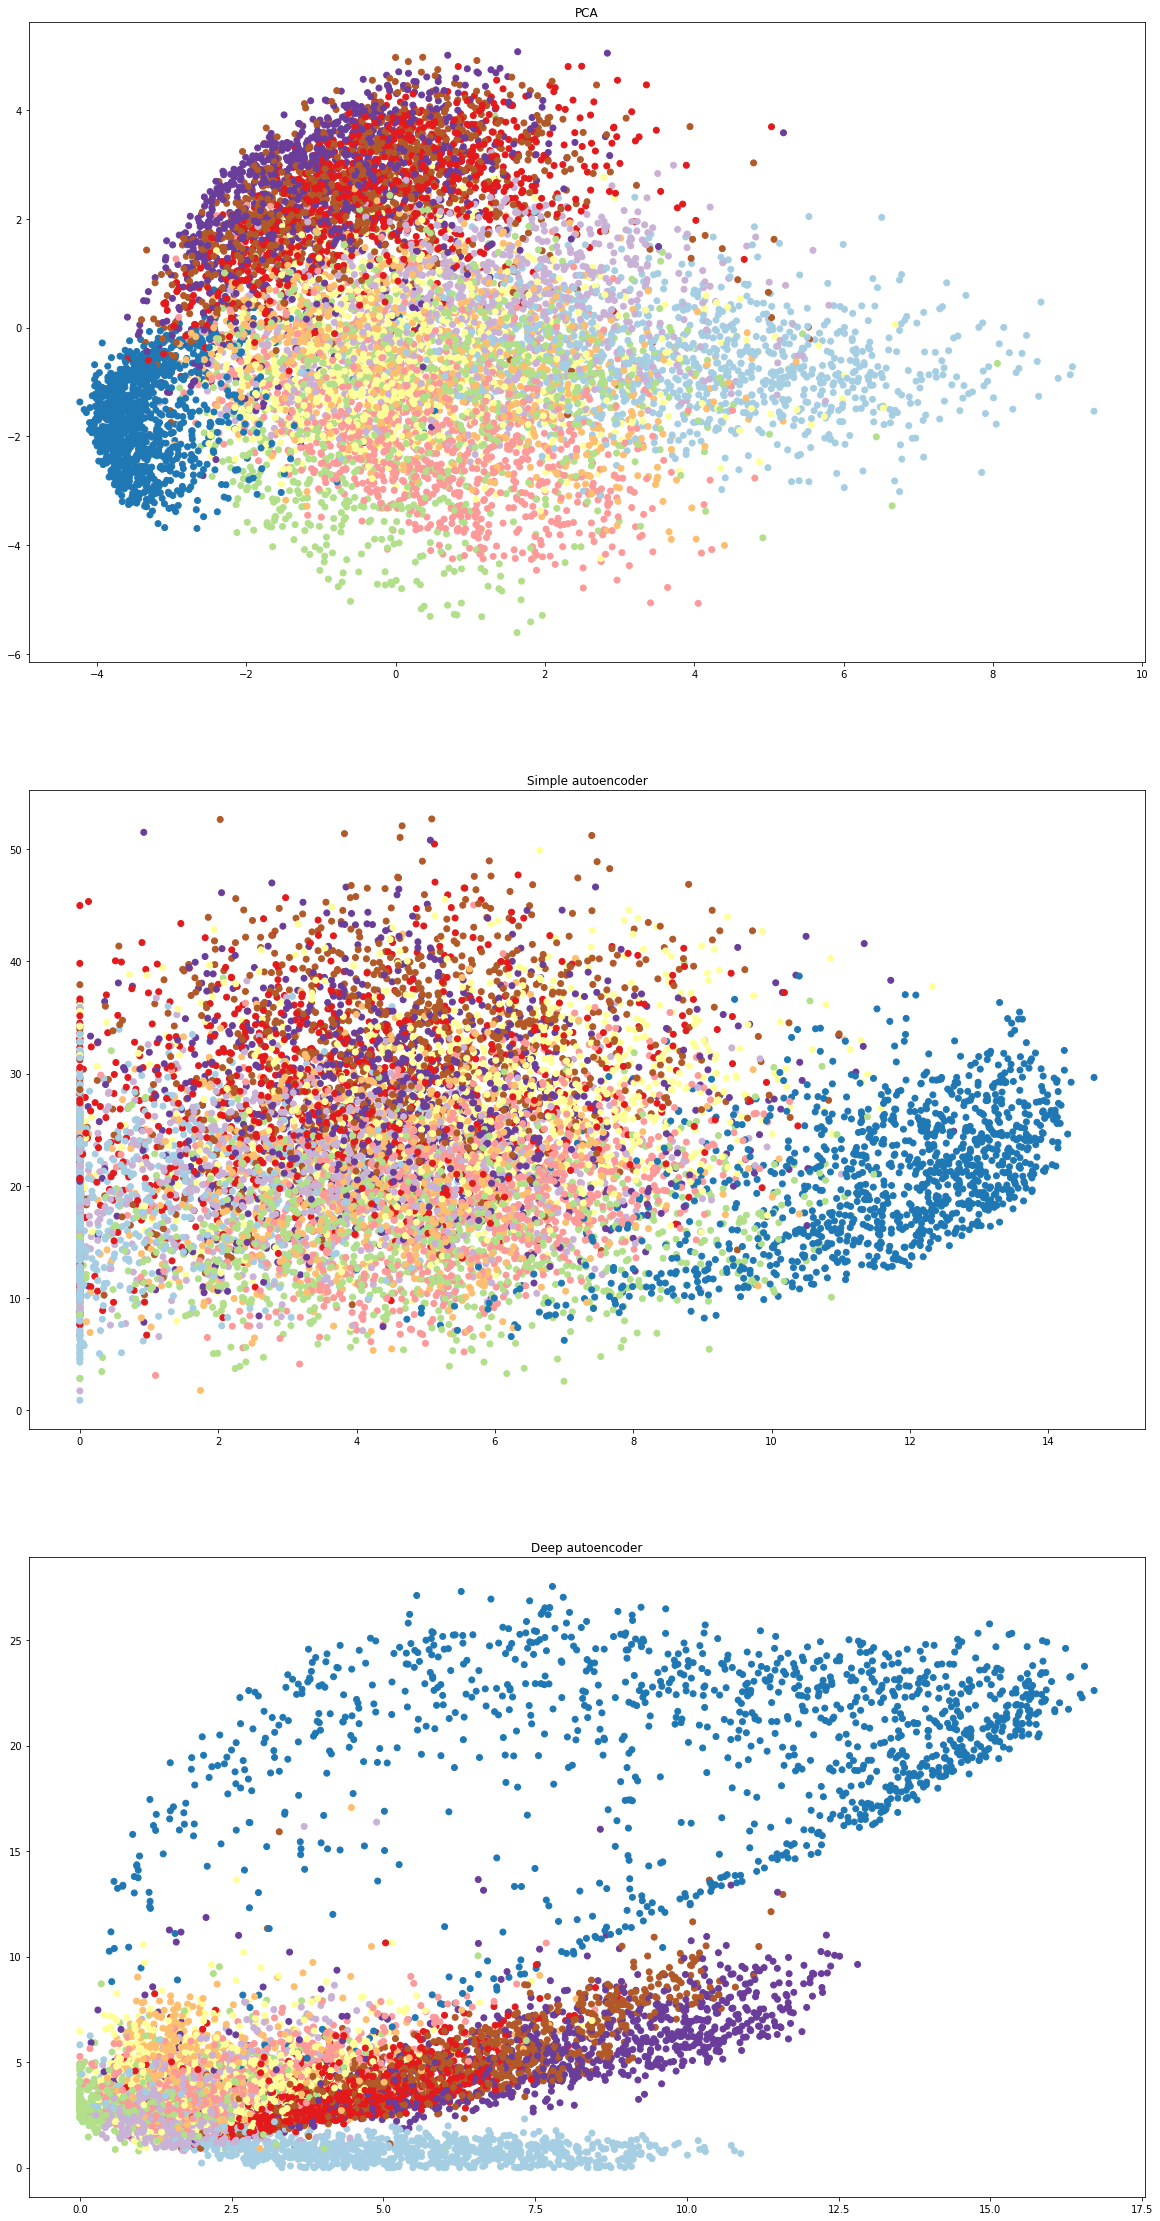

In [24]:
x_test_pca_vec = pca.transform(x_test)
x_test_simple_code = simple_encoder.predict(x_test)
x_test_deep_code = deep_encoder.predict(x_test)

plt.figure(figsize=(20, 40))

ax = plt.subplot(3, 1, 1)
plt.title("PCA")
plt.scatter(x_test_pca_vec[:,0], x_test_pca_vec[:,1], c=y_test, cmap=plt.cm.Paired)

ax = plt.subplot(3, 1, 2)
plt.title("Simple autoencoder")
plt.scatter(x_test_simple_code[:,0], x_test_simple_code[:,1], c=y_test, cmap=plt.cm.Paired)

ax = plt.subplot(3, 1, 3)
plt.title("Deep autoencoder")
plt.scatter(x_test_deep_code[:,0], x_test_deep_code[:,1], c=y_test, cmap=plt.cm.Paired)

plt.show()